In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install ultralytics roboflow --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 39.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 94.8 MB/s eta 0:00:00:00:01
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the 

In [3]:
from roboflow import Roboflow

In [4]:
import os
from roboflow import Roboflow

api_key = os.getenv("ROBOFLOW_API_KEY")
if not api_key:
    raise ValueError("Set ROBOFLOW_API_KEY in the environment.")

rf = Roboflow(api_key=api_key)
project = rf.workspace("saas-z6xqj").project("skin-disease-yup5l-agqjd")
version = project.version(2)
dataset = version.download("folder")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Skin-Disease-2 in folder:: 100%|██████████| 4994/4994 [00:00<00:00, 12199.20it/s]


In [5]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
model = YOLO("yolov8m-cls.pt")

In [7]:
model

YOLO(
  (model): ClassificationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running

In [9]:
model.train(
    data="/kaggle/working/Skin-Disease-2",
    epochs=30,
    imgsz=224,
    batch=32,
    device=0
)

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/Skin-Disease-2, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ceff886ddf0>
curves: []
curves_results: []
fitness: 0.9904618561267853
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9809237122535706, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9904618561267853}
save_dir: PosixPath('/kaggle/working/runs/classify/train2')
speed: {'preprocess': 0.11178854819250722, 'inference': 0.8871199879517387, 'loss': 0.0040837871485526036, 'postprocess': 0.0006962821283288949}
task: 'classify'
top1: 0.9809237122535706
top5: 1.0

In [10]:
metrics = model.val()
print(metrics)

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,769,061 parameters, 0 gradients, 41.6 GFLOPs
train: /kaggle/working/Skin-Disease-2/train... found 3480 images in 5 classes ✅ 
val: /kaggle/working/Skin-Disease-2/valid... found 996 images in 5 classes ✅ 
test: /kaggle/working/Skin-Disease-2/test... found 498 images in 5 classes ✅ 
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 260.3±93.0 MB/s, size: 7.3 KB)
val: Scanning /kaggle/working/Skin-Disease-2/valid... 996 images, 0 corrupt: 100% ━━━━━━━━━━━━ 996/996 321.3Mit/s 0.0s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 63/63 39.9it/s 1.6s0.1s
                   all      0.981          1
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /kaggle/working/runs/classify/val
ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.Con

In [11]:
model.val(data="/kaggle/working/Skin-Disease-2/test")

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
WARNING ⚠️ Dataset 'split=train' not found at /kaggle/working/Skin-Disease-2/test/train
Found 498 images in subdirectories. Attempting to split...
Splitting /kaggle/working/Skin-Disease-2/test (5 classes, 498 images) into 80% train, 20% val...
Split complete in /kaggle/working/Skin-Disease-2/test_split ✅
train: /kaggle/working/Skin-Disease-2/test_split/train... found 396 images in 5 classes ✅ 
val: /kaggle/working/Skin-Disease-2/test_split/val... found 102 images in 5 classes ✅ 
test: None...
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 162.5±26.7 MB/s, size: 7.6 KB)
val: Scanning /kaggle/working/Skin-Disease-2/test_split/val... 102 images, 0 corrupt: 100% ━━━━━━━━━━━━ 102/102 2.5Kit/s 0.0s
val: New cache created: /kaggle/working/Skin-Disease-2/test_split/val.cache
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 7/7 10.8it/s 0.6s.5s
                   all       0.98       

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cef1493d2e0>
curves: []
curves_results: []
fitness: 0.9901960790157318
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9803921580314636, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9901960790157318}
save_dir: PosixPath('/kaggle/working/runs/classify/val2')
speed: {'preprocess': 0.4459847254886828, 'inference': 2.9207994705882134, 'loss': 0.030070696082065314, 'postprocess': 0.0038354607833449945}
task: 'classify'
top1: 0.9803921580314636
top5: 1.0

In [12]:
import numpy as np
from pathlib import Path

test_dir = Path("/kaggle/working/Skin-Disease-2/test")
class_names = model.names

y_true = []
y_pred = []

for class_idx, class_name in class_names.items():
    for img_path in (test_dir / class_name).glob("*"):
        r = model(img_path, verbose=False)[0]
        y_true.append(class_idx)
        y_pred.append(int(r.probs.top1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

print("Samples:", len(y_true))

Samples: 498


In [13]:
accuracy = (y_true == y_pred).mean()
print(f"Overall Accuracy: {accuracy:.4f}")

Overall Accuracy: 0.9859


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report 

In [15]:
from collections import defaultdict

class_correct = defaultdict(int)
class_total = defaultdict(int)

for t, p in zip(y_true, y_pred):
    class_total[t] += 1
    if t == p:
        class_correct[t] += 1

print("Per-class Accuracy:")
for idx, name in class_names.items():
    acc = class_correct[idx] / class_total[idx]
    print(f"{name:<12}: {acc:.4f}")

Per-class Accuracy:
Acne        : 0.9770
Basal Cell Carcinoma: 0.9796
Melanoma    : 0.9820
Normal      : 1.0000
Psoriasis   : 0.9888


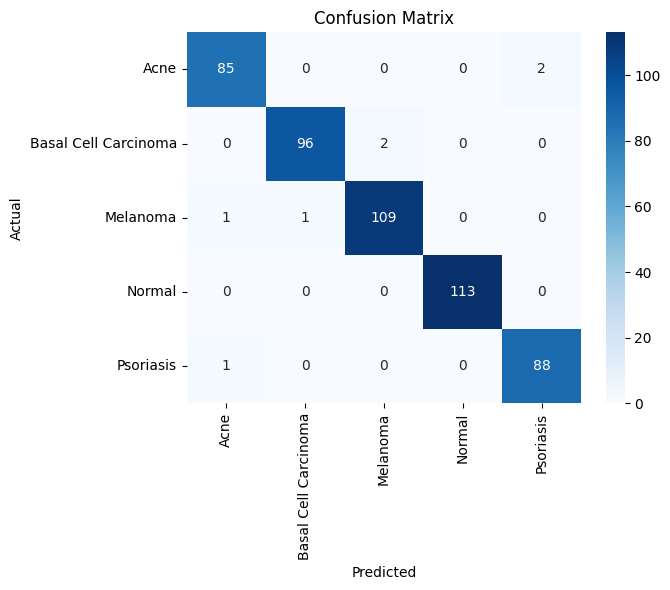

In [29]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names.values(),
    yticklabels=class_names.values()
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [17]:
print(
    classification_report(
        y_true,
        y_pred,
        target_names=list(class_names.values()),
        digits=4
    )
)

                      precision    recall  f1-score   support

                Acne     0.9770    0.9770    0.9770        87
Basal Cell Carcinoma     0.9897    0.9796    0.9846        98
            Melanoma     0.9820    0.9820    0.9820       111
              Normal     1.0000    1.0000    1.0000       113
           Psoriasis     0.9778    0.9888    0.9832        89

            accuracy                         0.9859       498
           macro avg     0.9853    0.9855    0.9854       498
        weighted avg     0.9860    0.9859    0.9859       498



In [21]:
test_model = YOLO("/kaggle/working/runs/classify/train2/weights/best.pt")

results = test_model("/kaggle/working/Skin-Disease-2/test/Normal/normal_0005dc5d1e4f6d3d56e7_jpg.rf.b2eb17f2415788dc8e6d897da527625b.jpg")
print(results[0].probs)


image 1/1 /kaggle/working/Skin-Disease-2/test/Normal/normal_0005dc5d1e4f6d3d56e7_jpg.rf.b2eb17f2415788dc8e6d897da527625b.jpg: 224x224 Normal 1.00, Acne 0.00, Psoriasis 0.00, Melanoma 0.00, Basal Cell Carcinoma 0.00, 5.0ms
Speed: 2.2ms preprocess, 5.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
ultralytics.engine.results.Probs object with attributes:

data: tensor([6.0654e-04, 1.1634e-08, 5.0507e-06, 9.9906e-01, 3.2785e-04], device='cuda:0')
orig_shape: None
shape: torch.Size([5])
top1: 3
top1conf: tensor(0.9991, device='cuda:0')
top5: [3, 0, 4, 2, 1]
top5conf: tensor([9.9906e-01, 6.0654e-04, 3.2785e-04, 5.0507e-06, 1.1634e-08], device='cuda:0')


In [22]:
pred_idx = results[0].probs.top1
confidence = float(results[0].probs.top1conf)
class_name = model.names[pred_idx]

print(f"Predicted class: {class_name}")
print(f"Confidence: {confidence:.4f}")

Predicted class: Normal
Confidence: 0.9991


**Simple way instead large scripting**

In [23]:
r = results[0]
print(
    f"Predicted: {model.names[r.probs.top1]} "
    f"({float(r.probs.top1conf):.4f})"
)

Predicted: Normal (0.9991)
